# Clustering Iris Dataset 

### Importing Libraries

In [2]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Importing dataset

In [3]:
dataset = sns.load_dataset("iris")
display(dataset)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Null Check

In [5]:
dataset.isnull().sum()

#From the null value chack we can see that there are no null values in the datasets.

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Encoding

In [6]:
dataset['species'] = dataset['species'].replace(['setosa', 'versicolor', 'virginica'],[1, 2, 3])

#We perform encoding above as the algorithm would not read string values. So, we encode the values 0, 1 and 2 to Setosa, 
#Versicolor and Virginica respictively.

### Splitting the data

In [7]:
X = dataset.iloc[:, [0,2]].values

#1) Here, we need to understand that all the columns are needed only for clustering. Unlike a regression problem we aren't 
#trying to determine any value from the independent variables and their relation. We will simple classify the different 
#customers from the datasets. So, from the variable X, we will be including all the ROWS and COLUMNS.

#2) Since the predition of the model will be done on a 2D graph, we will be considering only 2 independent features from the
#table as multiple variables will need multiple dimesions to display on a 2D graph.

### Using Elbow method to find optimal number of clusters 


In [23]:
from sklearn.cluster import KMeans
WCSS = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) #The value of K can be anything. Purpose of 42 = ?
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
    
#We know that the maximum number of clusters that can be formed are 3 from the dataset. (i.e) - Setosa, Versicolor, Virginica,
#we will give the range of values to be plotted over the x-axis at 10.

D:\Setups\Anaconda\Application\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Elbow Method Plotting

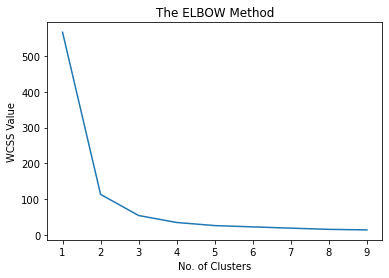

In [24]:
'''
In the Elbow Method, for the selection of clusters - 'K' for a given model, we plot the graphs to find the WCSS value against
the number of clusters. And the least value after which the change is very negligable, we mark the point at which the number of
clusters gets defined for a given model.

This is one of a classical methods and usually we get arbitrary values unlike the graph. So, we need to be calculative to choose
the right number of clusters according to the type of data-points we will have according to the dataaset.
'''

frame = pd.DataFrame({'Cluster': range(1,10), 'SSE':WCSS})
plt.plot(frame['Cluster'], frame['SSE'])#, marker='o')
plt.title('The ELBOW Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS Value')
plt.show()

### Training the DataSet

In [30]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 1002)
Predicted = kmeans.fit_predict(X)
print(Predicted)

#From the encoding above, the values 0, 1 and 2 correspond to Setosa, Versicolor and Virginica.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


## Visualizing the Clusters

### Plotting Data Points and Centroids

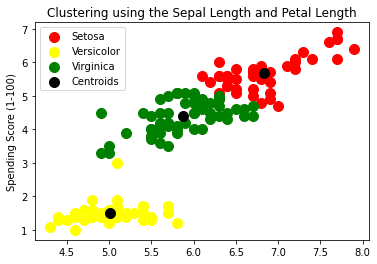

In [33]:
plt.scatter(X[Predicted == 0, 0], X[Predicted == 0, 1], s = 100, c = 'red', label = 'Setosa')
plt.scatter(X[Predicted == 1, 0], X[Predicted == 1, 1], s = 100, c = 'yellow', label = 'Versicolor')
plt.scatter(X[Predicted == 2, 0], X[Predicted == 2, 1], s = 100, c = 'green', label = 'Virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clustering using the Sepal Length and Petal Length')
plt.xlabel('')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()